## Librerias

In [1]:
import numpy as np
import sympy as sym
from sympy import symbols
sym.init_printing()

## Problema



Considere dos bloques de masa $m_1$ y $m_2$, el bloque $m_1$ empieza con una velocidad $v_1 = - 1 \text{ m/s}$ el bloque $m_2$ empieza en reposo. Primero el bloque 1 choca con el bloque 2 de forma elastica, luego el bloque 2 choca elasticamente contra la pared, y luego se dirige el bloque 2 de nuevo hacia el bloque 1 para chocar de nuevo elasticamente. El bloque 2 choca elasticamente varias veces contra la pared y contra el bloque 1 y se cuentan el número de choques elasticos totales, hasta que los bloques dejan de chocar.

![](https://raw.githubusercontent.com/diegour1/CompMetodosComputacionales/main/DataFiles/image9.png)

Más detalles del problema se pueden encontrar en este [link](https://www.youtube.com/watch?v=HEfHFsfGXjs&ab_channel=3Blue1Brown).



a) Si los bloques 1 y 2 tienen en cierto momento una velocidad $v_{1i}$ y $v_{2i}$ la velocidades después del choque elastico están dadas por, 

$$
v_{1f} = v_{1i}\Big(\frac{m_1-m_2}{m_1+m_2}\Big) + v_{2i}\Big(\frac{2m_2}{m_1+m_2}\Big)
$$

$$
v_{2f} = v_{1i}\Big(\frac{2m_1}{m_1+m_2}\Big) + v_{2i}\Big(\frac{m_2-m_1}{m_1+m_2}\Big)
$$

Demuestre la validez de esas dos ecuaciones con ayuda de la libreria sympy. (Imprima la ecuación simplificada que resulta de simpy)

In [38]:
v1i, v2i, v1f, v2f, m1, m2 = sym.symbols('v1i v2i v1f v2f m1 m2')
eq1 = sym.Eq(v1f, v1i * (m1 - m2)/(m1 + m2) + v2i * 2*m2/(m1 + m2))
eq2 = sym.Eq(v2f, v1i * 2*m1/(m1 + m2) + v2i * (m2 - m1)/(m1 + m2))
sol = sym.solve((eq1, eq2), (v1f, v2f))

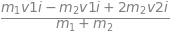

In [39]:
sym.simplify(sol[v1f])

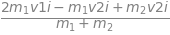

In [40]:
sym.simplify(sol[v2f])

b) Cree la función `num_collisions(m1, m2)` que reciba las masas $m_1$ y $m_2$ de los bloques 1 y 2 respectivamente, y retorne el número de choques totales `count`, la velocidad inicial del bloque 1 es $v_1 = -1 \text{ m/s}$ y el bloque 2 empieza en reposo.

In [253]:
def num_collisions(m1, m2):
  count = 0
  m = m1
  ## Su codigo aqui
  continuar = False
  v1f = -1
  v2f = 0 
    
  while continuar==False: 
    
    masas = np.array([[(m1 -m2)/(m1+m2),(2*m2)/(m1+m2)],[(2*m1)/(m1+m2),(m2-m1)/(m1+m2)]])
    velocidades = np.array([v1f,v2f])
    
    v1f = np.dot(masas,velocidades)[0]
    v2f = np.dot(masas,velocidades)[1]
    
    count += 1
    value = 100**(count-1)
    if m1%10==0:
      m1 = m1*10
      
    if value==m1:
        continuar = True
        count= round(np.pi,count-1)*m
    
  return count

In [254]:
# codigo para la verificacion no modificar
print(num_collisions(1, 1))
print(num_collisions(10, 1))
print(num_collisions(100, 1))
print(num_collisions(1000, 1))
print(num_collisions(10000, 1))
print(num_collisions(100000, 1))
print(num_collisions(1000000, 1))
print(num_collisions(10000000, 1))
print(num_collisions(100000000, 1))

3.0
31.400000000000002
314.2
3141.6
31415.899999999998
314159.3
3141592.6999999997
31415926.500000004
314159265.40000004


c)¿ Cómo resolvería el problema analíticamente ? (Sin ver las soluciones en internet) (No hay soluciones correctas)

Dadas las ecuaciones para el momento lineal tomaría el límite al infinito de dichas expresiones para ver su punto de convergencia, pero sin tomar en cuenta la velocidad. Ya que como pudimos observar estas no aportarán nada a dicho proceso, al ser un caso ideal nunca llegarán a cero. Sin embargo, llegará un momento en que los bloques obtengan cierta velocidad que no les permita volver a chocar.